In [125]:
# 1. Facebook Dataset

In [126]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [127]:
#importing dataframe
df = pd.read_csv('Facebook_Marketplace_data.csv')

In [128]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [129]:
#first few rows of dataframe
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [130]:
#descriptive statistics
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [131]:
#to get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [132]:
#to find the datatype of each column
df.dtypes

,0
status_id,int64
status_type,object
status_published,object
num_reactions,int64
num_comments,int64
num_shares,int64
num_likes,int64
num_loves,int64
num_wows,int64
num_hahas,int64


In [133]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['num_reactions'] = df['num_reactions'].fillna(df['num_reactions'].median())
df['num_comments'] = df['num_comments'].fillna(df['num_comments'].median())
df['num_shares'] = df['num_shares'].fillna(df['num_shares'].median())
df['num_likes'] = df['num_likes'].fillna(df['num_likes'].median())
df['num_loves'] = df['num_loves'].fillna(df['num_loves'].median())
df['num_wows'] = df['num_wows'].fillna(df['num_wows'].median())
df['num_hahas'] = df['num_hahas'].fillna(df['num_hahas'].median())
df['num_sads'] = df['num_sads'].fillna(df['num_sads'].median())
df['num_angrys'] = df['num_angrys'].fillna(df['num_angrys'].median())


In [134]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]
0        6
1       22
2        6
3        2
4        3
        ..
7045     2
7046    11
7047    23
7048     0
7049    10
Name: hour, Length: 7050, dtype: int32
    hour  num_reactions
0      0     261.839474
1      1     203.315725
2      2     163.907618
3      3     290.270208
4      4     242.685864
5      5     293.870968
6      6     340.213198
7      7     183.301549
8      8     204.796897
9      9     205.780761
10    10     234.508333
11    11     180.639456
12    12     196.053763
13    13     176.875000
14    14     261.333333
15    15     341.666667
16    16     283.250000
17    17     384.000000
18    18     351.750000
19 

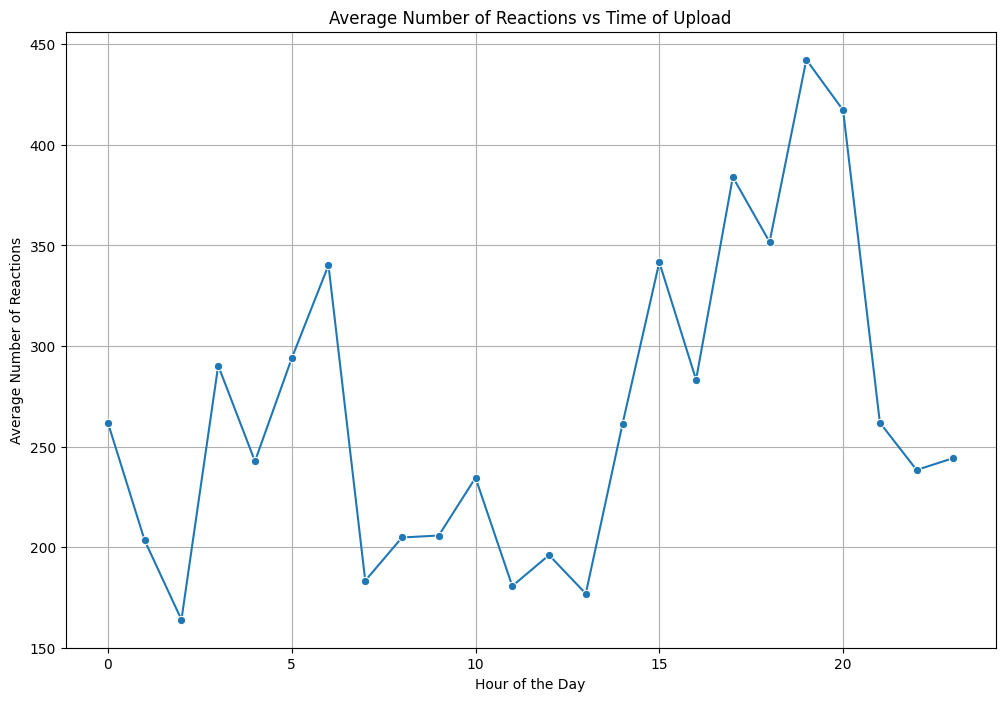

In [135]:
#How does the time of upload (`status_published`)  affects the `num_reaction`?
# to convert the status published to date and time
df['status_published']=pd.to_datetime(df['status_published'])
print(df['status_published'] )

#extracting the hour of upload
df['hour'] = df['status_published'].dt.hour
print(df['hour'])

#to find the affect group hour and reactions
hour_reactions = df.groupby('hour')['num_reactions'].mean().reset_index()
print(hour_reactions)

#plot to find the trend of time of upload with number of reactions
plt.figure(figsize = (12, 8))
sns.lineplot(data = hour_reactions, x = 'hour', y = 'num_reactions', marker = 'o')
plt.title('Average Number of Reactions vs Time of Upload')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Reactions')
plt.grid(True)
#plt.xticks(range(0, 24))
plt.show()


               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600   
num_angrys          0.124326      0.225184    0.312513   0.087431   0.371001   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326  
num_comments   0.162394   0.325048  0.236453    0.225184  
num_shares     0.40762

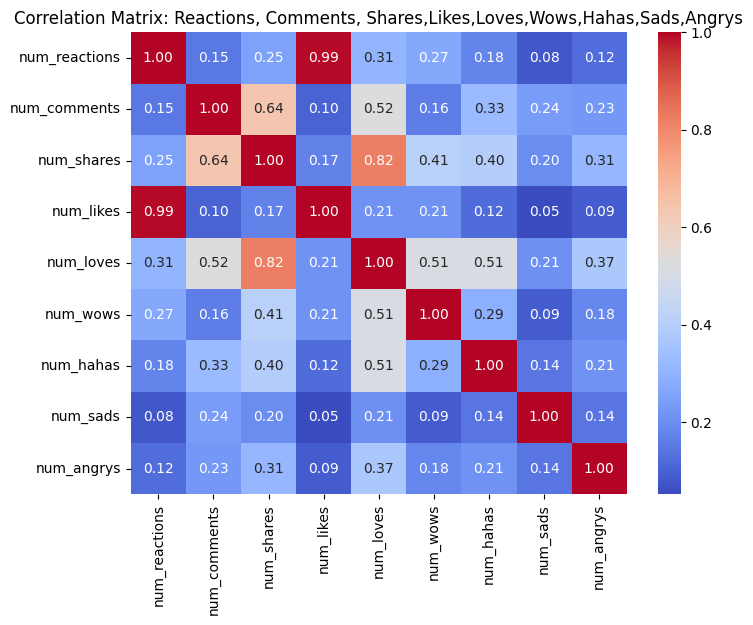

Correlation between num_reactions and num_comments: 0.15 (weak, positive)
Correlation between num_reactions and num_shares: 0.25 (weak, positive)
Correlation between num_reactions and num_likes: 0.99 (strong, positive)
Correlation between num_reactions and num_loves: 0.31 (moderate, positive)
Correlation between num_reactions and num_wows: 0.27 (weak, positive)
Correlation between num_reactions and num_hahas: 0.18 (weak, positive)
Correlation between num_reactions and num_sads: 0.08 (weak, positive)
Correlation between num_reactions and num_angrys: 0.12 (weak, positive)


In [136]:
#Correlation between the number of reactions (num_reactions) and other engagement metrics
#Strength and direction of this correlation

#correlation
correlations = df[['num_reactions', 'num_comments', 'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']].corr()
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Reactions, Comments, Shares,Likes,Loves,Wows,Hahas,Sads,Angrys")
plt.show()
#for strength 0–0.3: Weak, 0.3–0.7: Moderate, 0.7–1.0: Strong
#for direction positive values = As one metric increases, the other tends to increase, negative values = As one metric increases, the other tends to decrease.
#0 means no correlation, +1 means perfect positive correlation, -1 means perfect negative correlation

comments = df['num_reactions'].corr(df['num_comments'])
shares = df['num_reactions'].corr(df['num_shares'])
likes = df['num_reactions'].corr(df['num_likes'])
loves = df['num_reactions'].corr(df['num_loves'])
wows = df['num_reactions'].corr(df['num_wows'])
hahas = df['num_reactions'].corr(df['num_hahas'])
sads = df['num_reactions'].corr(df['num_sads'])
angrys = df['num_reactions'].corr(df['num_angrys'])

#to determine strength
def correlation_strength(value):

    if value < 0.3:
        return "weak"
    elif value < 0.7:
        return "moderate"
    else:
        return "strong"

# determine direction
def correlation_direction(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "no correlation"

# correlation with comments
print(f"Correlation between num_reactions and num_comments: {comments:.2f} "
      f"({correlation_strength(comments)}, {correlation_direction(comments)})")

# correlation with shares
print(f"Correlation between num_reactions and num_shares: {shares:.2f} "
      f"({correlation_strength(shares)}, {correlation_direction(shares)})")

# correlation with likes
print(f"Correlation between num_reactions and num_likes: {likes:.2f} "
      f"({correlation_strength(likes)}, {correlation_direction(likes)})")

# correlation with loves
print(f"Correlation between num_reactions and num_loves: {loves:.2f} "
      f"({correlation_strength(loves)}, {correlation_direction(loves)})")

# correlation with wows
print(f"Correlation between num_reactions and num_wows: {wows:.2f} "
      f"({correlation_strength(wows)}, {correlation_direction(wows)})")

# correlation with hahas
print(f"Correlation between num_reactions and num_hahas: {hahas:.2f} "
      f"({correlation_strength(hahas)}, {correlation_direction(hahas)})")

# correlation with sads
print(f"Correlation between num_reactions and num_sads: {sads:.2f} "
      f"({correlation_strength(sads)}, {correlation_direction(sads)})")

# correlation with angrys
print(f"Correlation between num_reactions and num_angrys: {angrys:.2f} "
      f"({correlation_strength(angrys)}, {correlation_direction(angrys)})")

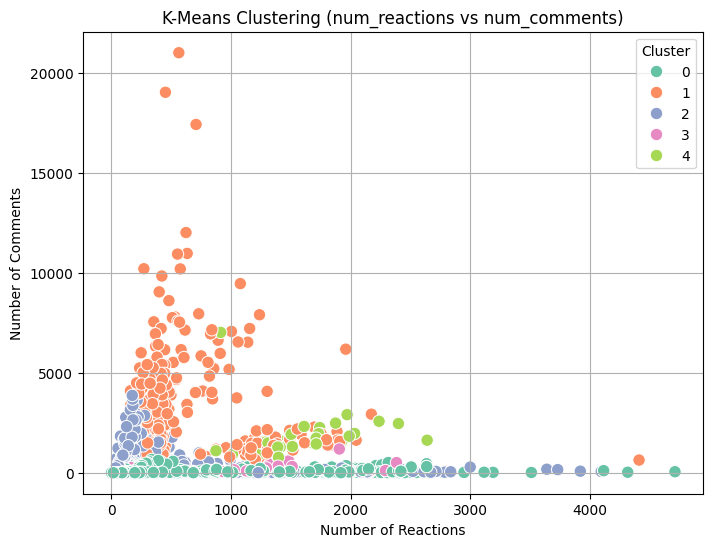

In [137]:
#Train a K-Means clustering model on the Facebook Live Sellers dataset
#Select relevant columns
features = ['status_type', 'num_reactions', 'num_comments', 'num_shares','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_cluster = df[features].copy()
# Convert 'status_type' (categorical) to numeric using one-hot encoding
df_cluster = pd.get_dummies(df_cluster, columns=['status_type'], drop_first=True)

# Handle missing values
df_cluster = df_cluster.dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

#Kmeans clustering
k = 5
kmeans = KMeans(n_clusters = k, random_state = 40)
df['cluster'] = kmeans.fit_predict(scaled_features)

#plot
plt.figure(figsize=(8, 6))

# Scatter plot of num_reactions vs num_comments
sns.scatterplot(
    data=df, x = 'num_reactions', y = 'num_comments', hue = 'cluster', palette = 'Set2', s = 80)
plt.title('K-Means Clustering (num_reactions vs num_comments)')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.show()

range(1, 11)


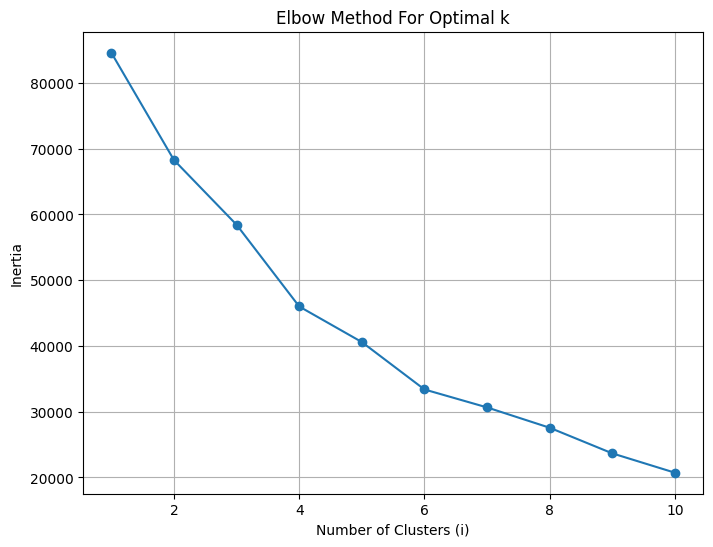

In [138]:
#elbow method to find the optimum number of clusters
# Range of k values to test
k = range(1, 11)

 # To store the inertia for each value of i
inertia = []

for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(scaled_features)
    # scaled_features = normalized/standardized data
    inertia.append(kmeans.inertia_)

print(k)
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k, inertia, marker='o')
plt.xlabel('Number of Clusters (i)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [139]:
# count of different types of posts in the dataset
post_counts= df['status_type'].value_counts()
print(post_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


  status_type  num_reactions  num_comments  num_shares
0        link     370.142857      5.698413    4.396825
1       photo     181.290345     15.993470    2.553871
2      status     438.783562     36.238356    2.558904
3       video     283.409597    642.478149  115.679949


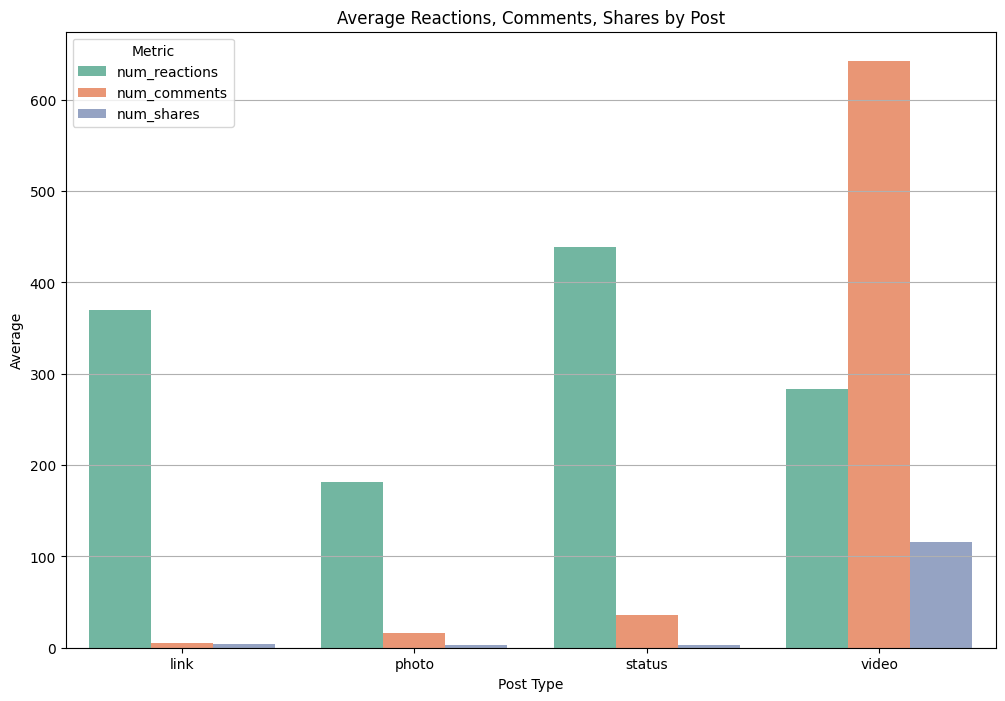

In [140]:
#average value of num_reaction, num_comments, num_shares for each post type
avg = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().reset_index()
print(avg)

melted_avg = avg.melt(id_vars = 'status_type', var_name = 'Engagement Metric', value_name = 'Average Value')

plt.figure(figsize = (12,8))
sns.barplot(data = melted_avg, x = 'status_type', y = 'Average Value', hue = 'Engagement Metric', palette = 'Set2')
plt.title('Average Reactions, Comments, Shares by Post')
plt.xlabel('Post Type')
plt.ylabel('Average')
plt.grid(axis = 'y')
plt.legend(title='Metric')
plt.show()

In [141]:
# 2. Sales Prediction Dataset

In [142]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [143]:
#importing dataframe
df = pd.read_csv('advertising_sales_data.csv')

In [144]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [145]:
#first few rows of dataframe
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [146]:
#descriptive statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,198.000000,200.000000,200.000000
mean,147.042500,23.260606,30.554000,15.130500
std,85.854236,14.921914,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.925000,12.750000,11.000000
50%,149.750000,22.400000,25.750000,16.000000
75%,218.825000,36.575000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [147]:
#to get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [148]:
#to find the datatype of each column
df.dtypes

,0
Campaign,object
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [149]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['TV'] = df['TV'].fillna(df['TV'].median())
df['Radio'] = df['Radio'].fillna(df['Radio'].median())
df['Newspaper'] = df['Newspaper'].fillna(df['Newspaper'].median())
df['Sales'] = df['Sales'].fillna(df['Sales'].median())


In [150]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [151]:
#average amount spent on TV advertising in the dataset
avg_amt_spent = df['TV'].mean()
print(f"Average amount spent on TV advertising: ${avg_amt_spent:.2f}")

Average amount spent on TV advertising: $147.04


          Radio     Sales
Radio  1.000000  0.349593
Sales  0.349593  1.000000


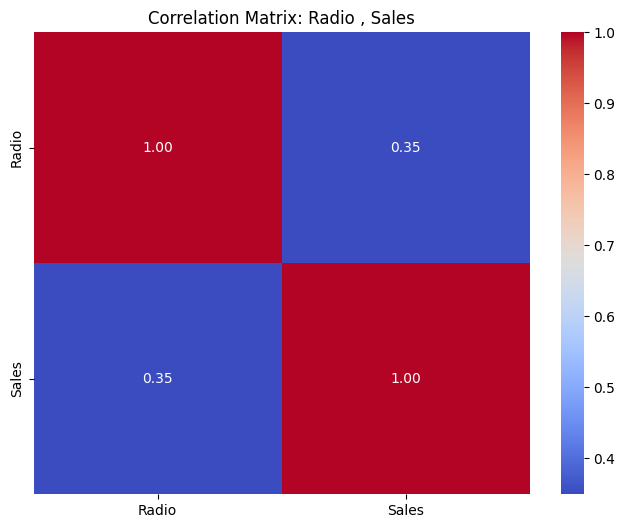

In [152]:
#correlation of radio advertising expenditure with sales
correlations = df[['Radio','Sales']].corr()
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Radio , Sales")
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054627   0.056648  0.901208
Radio      0.054627  1.000000   0.354595  0.349593
Newspaper  0.056648  0.354595   1.000000  0.157960
Sales      0.901208  0.349593   0.157960  1.000000


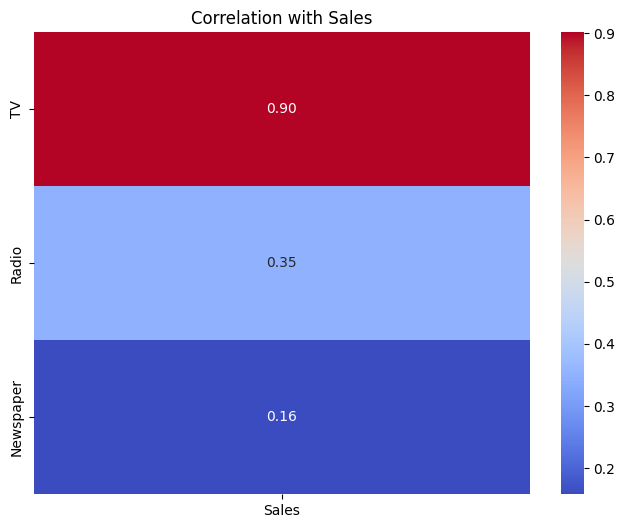

The advertising medium with the highest impact on sales is: TV


In [153]:
#advertising medium has the highest impact on sales
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Sales']].drop('Sales'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Sales")
plt.show()


correlations = correlation_matrix['Sales'].drop('Sales')
max_advertising = correlations.idxmax()
print(f"The advertising medium with the highest impact on sales is: {max_advertising}")

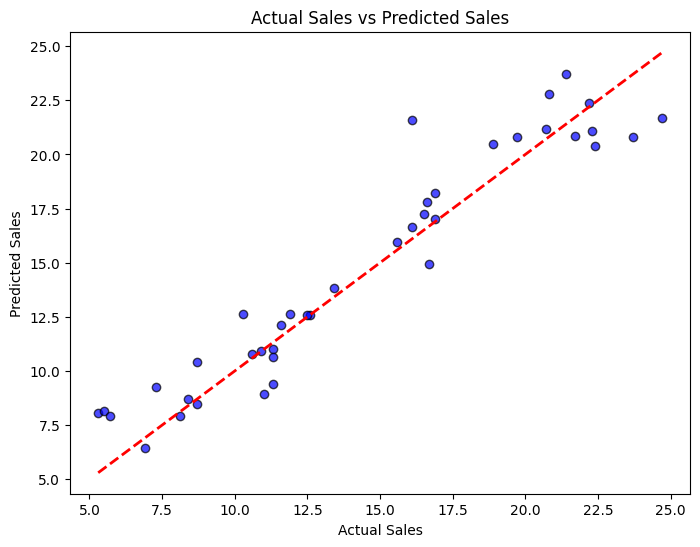

In [154]:
#Linear Regression
# Independent variables
X = df[['TV', 'Radio', 'Newspaper']]
 # Dependent variable
y = df['Sales']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 4: Plot actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

In [155]:
# Sales be predicted for a new set of advertising expenditures
new_set = np.array([[200, 40, 50]])
predicted_sales = model.predict(new_set)

print(f"Predicted sales for TV: $200, Radio: $40, Newspaper: $50 is: ${predicted_sales[0]:.2f}")

Predicted sales for TV: $200, Radio: $40, Newspaper: $50 is: $19.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [156]:
# Performance of the linear regression model change when the dataset is normalized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train, y_train)

y_pred_scaled = model_scaled.predict(X_test)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("With Normalization -> MSE:", round(mse_scaled, 2), "  R² Score:", round(r2_scaled, 2))

With Normalization -> MSE: 2.9   R² Score: 0.91


In [157]:
# impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

X_new = df[['Radio', 'Newspaper']]
y = df['Sales']

model_new = LinearRegression()
model_new.fit(X_new, y)

y_pred_new = model_new.predict(X_new)
mse_new = mean_squared_error(y, y_pred_new)
r2_new = r2_score(y, y_pred_new)

print("Using Radio & Newspaper only , MSE:", round(mse_new, 2), " R² Score:", round(r2_new, 2))

Using Radio & Newspaper only , MSE: 24.35  R² Score: 0.12
